In [1]:
import pandas as pd
import numpy as np
import talib as ta
from backtester import *
import matplotlib.pyplot as plt

import ffn

%matplotlib inline

In [2]:
df = pd.read_csv('SMI.csv', index_col='Date', parse_dates=True)
pvalues = pd.read_csv('pvalues.csv', index_col='id')
df.head()

,ABBN.SW,ADEN.SW,ALC.SW,BAER.SW,CFR.SW,CSGN.SW,GEBN.SW,GIVN.SW,LHN.SW,LONN.SW,...,NOVN.SW,ROG.SW,SCMN.SW,SGSN.SW,SIKA.SW,SLHN.SW,SREN.SW,UBSG.SW,UHR.SW,ZURN.SW
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,4.400477,38.785667,NaN,27.889044,20.749811,28.773228,31.811073,520.759766,42.050861,43.794674,...,29.513182,83.473877,222.316605,543.166565,-0.0,101.535606,44.969555,35.973286,132.534393,89.262367
2005-01-04,4.474833,38.419460,NaN,27.868874,20.586853,29.008593,32.587856,522.838623,42.807194,43.760757,...,29.385969,83.600838,222.070419,560.350952,-0.0,104.307526,44.915043,36.010334,133.004120,89.354576
2005-01-05,4.468072,38.219707,NaN,27.767910,20.124880,28.832102,31.811073,526.303406,43.200478,43.421494,...,29.029316,83.156494,221.085632,548.557678,-0.0,104.307526,44.915043,35.584286,131.203568,88.709091
2005-01-06,4.488351,37.953354,NaN,27.788082,20.396198,28.684984,NaN,528.728760,43.503006,43.319748,...,29.080717,83.219963,221.947296,548.894653,-0.0,105.331909,45.923450,35.695431,130.733856,89.354576
2005-01-07,4.515390,38.286289,NaN,27.868874,20.342422,28.626102,31.293217,532.886536,43.533222,43.489384,...,28.902102,83.283440,222.439682,554.285889,-0.0,105.211395,45.541897,35.473145,130.968719,89.216255


In [3]:
stock1 = 'UBSG.SW'
stock2 = 'CSGN.SW'

tmp = backtest(hr_signal(df, stock1, stock2), stock1, stock2)

18 trades were made


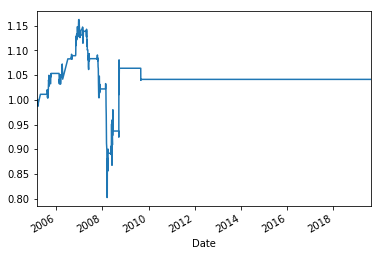

In [4]:
tmp.cum_returns.plot()

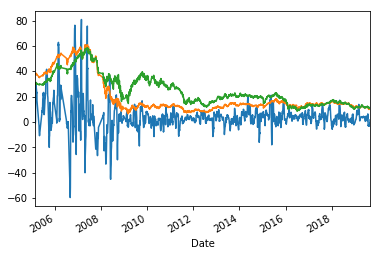

In [5]:
tmp.spread.plot()
tmp['UBSG.SW'].plot()
tmp['CSGN.SW'].plot()

In [7]:
stock1 = 'UBSG.SW'
stock2 = 'CSGN.SW'

entry = 2
exit = 0

p_mavg = 15
p_stdev = 15
p_rsi = 14
rsi_thres = 0

6 trades were made


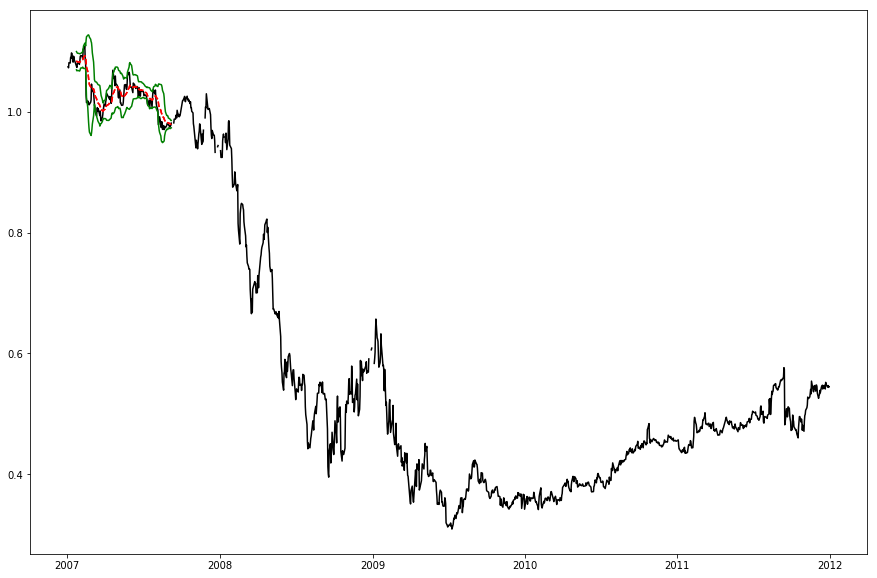

In [13]:
tmp = backtest(pt_signal(df['2007':'2011'], stock1, stock2, entry, exit, p_mavg, p_stdev, p_rsi, rsi_thres), stock1, stock2)
ret = tmp.cum_returns
plot_signal(tmp)

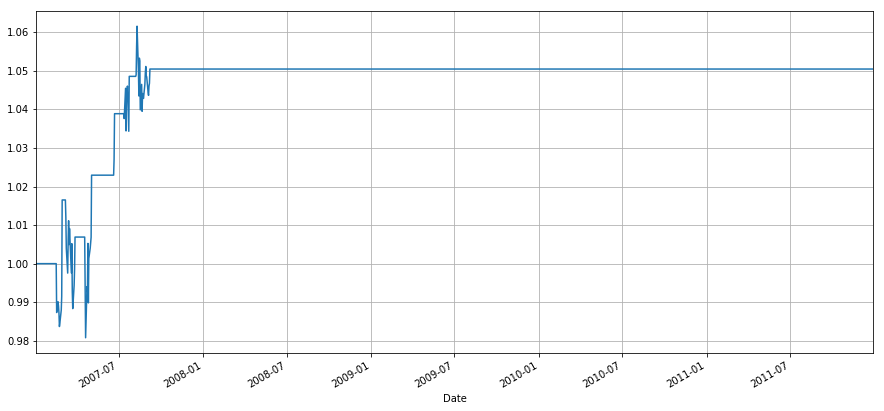

In [14]:
ret.iloc[0] = 1
ret.plot(figsize=(15,7),grid=True)

In [15]:
perf = ret.calc_stats() 
perf.display()

Stats for cum_returns from 2007-01-03 00:00:00 - 2011-12-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
5.05%               0.35  0.99%   -3.51%

Annualized Returns:
mtd    3m     6m     ytd    1y     3y     5y     10y    incep.
-----  -----  -----  -----  -----  -----  -----  -----  --------
0.00%  0.00%  0.00%  0.00%  0.00%  0.00%  0.99%  0.99%  0.99%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.35     0.70       -
mean    1.02%    1.01%      0.00%
vol     2.91%    1.45%      0.00%
skew    1.96     3.00       0.00
kurt    58.93    11.10      -
best    2.52%    1.89%      0.00%
worst   -1.53%   -0.95%     0.00%

Drawdowns:
max     avg       # days
------  ------  --------
-3.51%  -1.59%    279.17

Misc:
---------------  ------
avg. up month    1.24%
avg. down month  -0.02%
up year %        0.00%
12m up %         16.33%
----------

C:\Users\jango\Anaconda3\envs\research\lib\site-packages\ffn\core.py:2056: RuntimeWarning: invalid value encountered in true_divide
  res = np.divide(er.mean(), std)


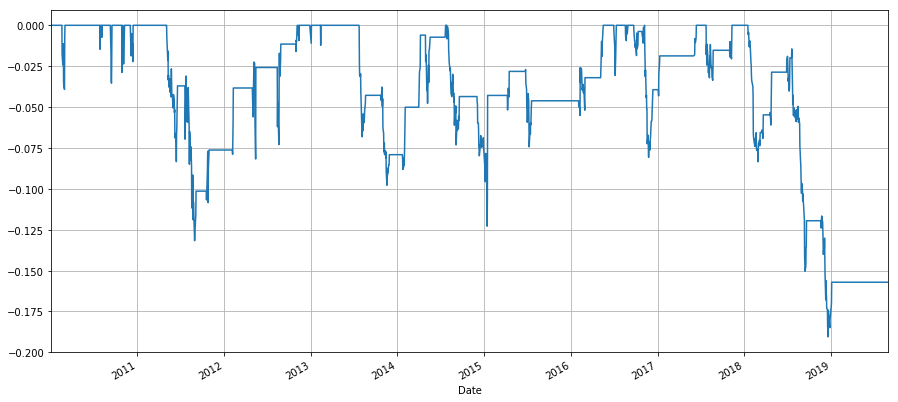

In [8]:
ffn.to_drawdown_series(ret).plot(figsize=(15,7),grid=True) 

In [42]:
current_quarter = df.index[0]

for index, row in df['2017'].iterrows():
    if index < current_quarter and current_quarter.isoweekday() in range(1, 6):
        pass
    else:
        current_quarter = (index + pd.offsets.QuarterEnd() - pd.DateOffset(1))
        if current_quarter.isoweekday() in range(6, 7):
            current_quarter = (current_quarter - pd.DateOffset(1))
    if index == current_quarter:
        print(index)
        print('----------------------------')

2017-03-30 00:00:00
----------------------------
2017-06-29 00:00:00
----------------------------
2017-09-29 00:00:00
----------------------------
2017-12-29 00:00:00
----------------------------


In [54]:
current_month = df.index[0]

for index, row in df['2017'].iterrows():
    if index < current_month and current_month.isoweekday() in range(1, 6):
        pass
    else:
        current_month = (index + pd.offsets.MonthEnd() - pd.DateOffset(1))
        if current_month.isoweekday() in range(6, 7):
            current_month = (current_month - pd.DateOffset(1))
    
    if index == current_month:
        print(current_month)
        """
        next_quarter = ((index + pd.DateOffset(5))+ pd.offsets.QuarterEnd())
        pairs = find_cointegrated_pairs(df[:index])
        for n in range(len(pairs)):
            stock1 = pairs[n][0]
            stock2 = pairs[n][1]
            
            print(stock1, stock2)
            name = str(index) + stock1 + "-" + stock2 
            
            signal = pt_signal(df, stock1, stock2, entry, exit, p_mavg, p_stdev, p_rsi, rsi_thres)
            
            tmp = backtest(signal[index:next_quarter], stock1, stock2)
            
            ret[name] = tmp.cum_returns
            
        print('----------------------------')
        """
        

2017-01-30 00:00:00
2017-02-27 00:00:00
2017-03-30 00:00:00
2017-04-28 00:00:00
2017-05-30 00:00:00
2017-06-29 00:00:00
2017-08-30 00:00:00
2017-09-29 00:00:00
2017-10-30 00:00:00
2017-11-29 00:00:00
2017-12-29 00:00:00
